# 05 — Resultados e Discussão (ENEM 2023)

**Objetivo:** consolidar os principais achados da análise exploratória para apresentação do checkpoint.

**Este notebook mostra:**
1. Estatísticas descritivas e distribuições (univariado).
2. Relações bivariadas: renda × nota; escolaridade dos pais × nota; tipo de escola × nota.
3. Correlações cruzadas (renda, escolaridade, notas).
4. Blocos de interpretação orientando a discussão.

In [1]:
%matplotlib inline
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DATA_PATH = Path("../data/interim/enem_2023.parquet")
print("Lendo:", DATA_PATH)
df = pd.read_parquet(DATA_PATH)
print("Dimensões:", df.shape)

NOTAS = ["NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_CH","NU_NOTA_CN","NU_NOTA_REDACAO"]
REQUIRED = ["Q006","Q006_ord","Q001","Q001_ord","Q002","Q002_ord","TP_ESCOLA","NOTA_MEDIA_5"] + NOTAS
missing = [c for c in REQUIRED if c not in df.columns]
if missing:
    raise RuntimeError(f"Faltam colunas necessárias: {missing}")

if "IN_TREINEIRO" in df.columns:
    df = df[df["IN_TREINEIRO"] == 0].copy()

df = df.dropna(subset=["NOTA_MEDIA_5","Q006_ord","Q001_ord","Q002_ord","TP_ESCOLA"]).copy()
print("Após filtros:", df.shape)
df.head(3)

Lendo: ../data/interim/enem_2023.parquet
Dimensões: (2166843, 20)
Após filtros: (2166843, 20)


,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_CH,NU_NOTA_CN,NU_NOTA_REDACAO,TP_ESCOLA,Q001,Q002,Q006,Q022,Q024,Q025,IN_TREINEIRO,NOTA_MEDIA_5,Q001_ord,Q002_ord,Q006_ord,Q022_ord,Q024_ord,Q025_ord
0,363.2,475.6,498.9,502.0,700.0,1,H,E,C,A,A,B,0,507.94,8,5,3,1,1,2
1,466.7,507.2,508.5,459.0,880.0,2,D,D,C,D,A,B,0,564.28,4,4,3,4,1,2
2,338.3,446.9,379.2,402.5,560.0,2,B,B,B,B,A,A,0,425.38,2,2,2,2,1,1


## 1) Estatísticas descritivas e distribuições (univariado)

In [2]:
desc = df[NOTAS + ["NOTA_MEDIA_5"]].describe().T
desc[["mean","std","min","25%","50%","75%","max"]]

,mean,std,min,25%,50%,75%,max
NU_NOTA_MT,532.231468,132.150883,0.0,428.60,519.7,628.10,958.60
NU_NOTA_LC,520.493241,75.059079,0.0,472.90,524.5,572.60,820.80
NU_NOTA_CH,527.010777,88.042461,0.0,470.60,533.3,588.60,823.00
NU_NOTA_CN,496.953440,88.333266,0.0,440.50,494.0,552.00,868.40
NU_NOTA_REDACAO,625.849395,208.859637,0.0,520.00,620.0,780.00,1000.00
NOTA_MEDIA_5,540.507664,96.517445,0.0,474.28,537.7,606.44,862.58


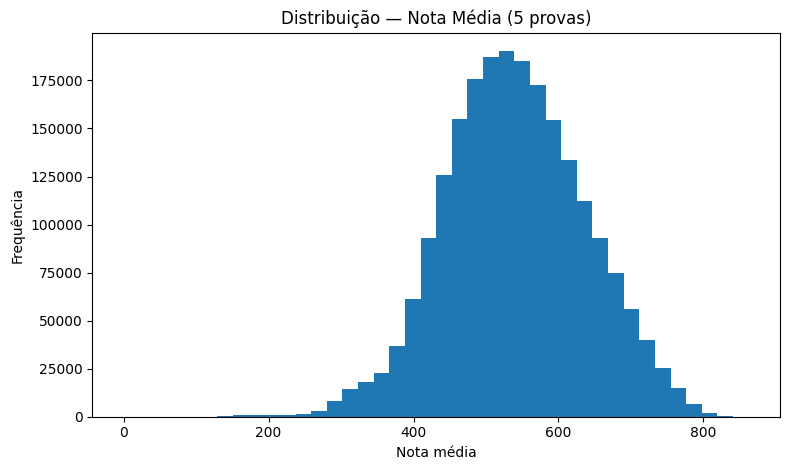

In [3]:
plt.figure(figsize=(8,4.8))
plt.hist(df["NOTA_MEDIA_5"].dropna(), bins=40)
plt.title("Distribuição — Nota Média (5 provas)")
plt.xlabel("Nota média")
plt.ylabel("Frequência")
plt.tight_layout()
plt.show()

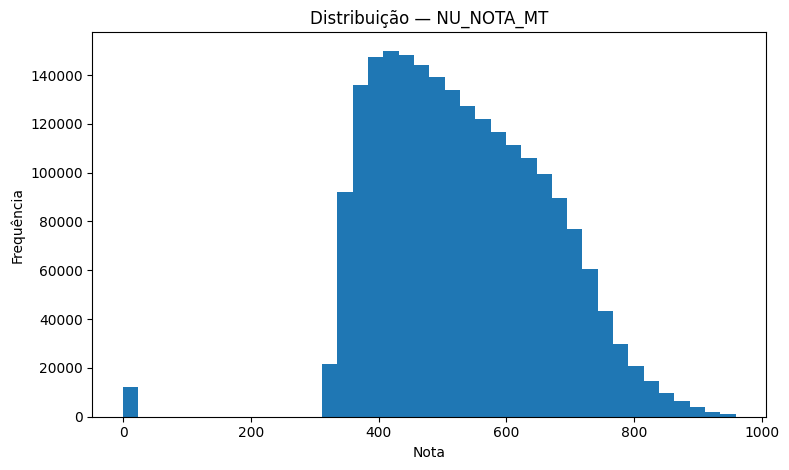

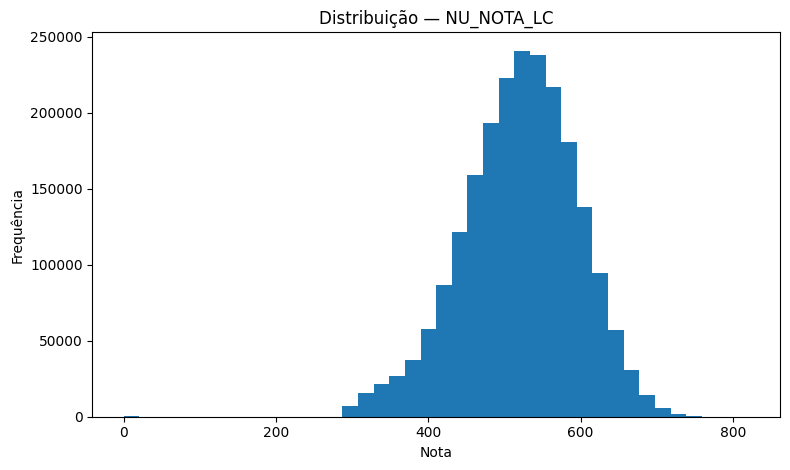

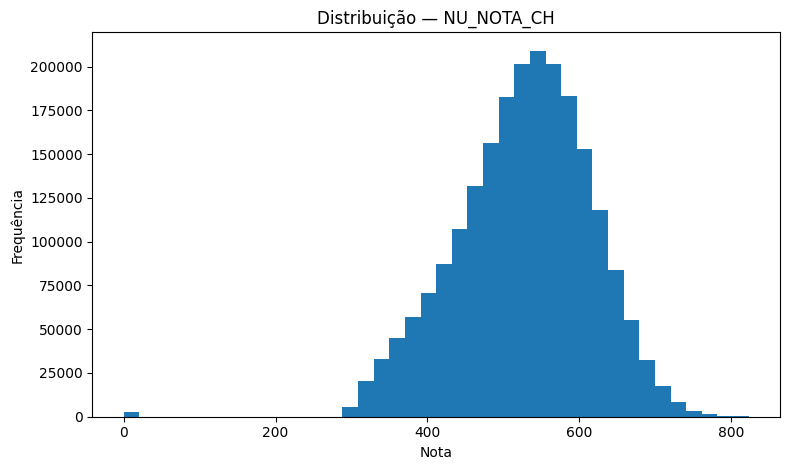

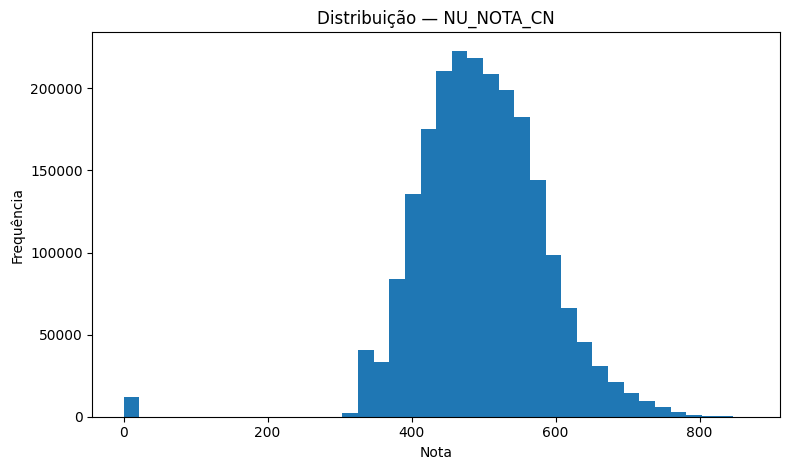

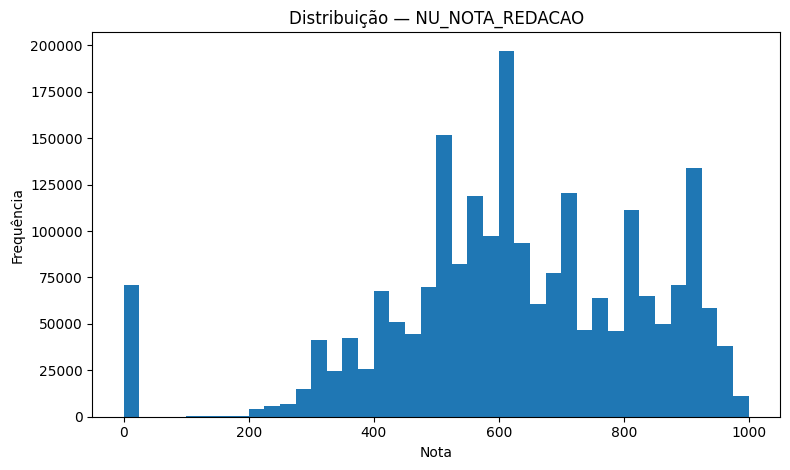

In [4]:
for col in ["NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_CH","NU_NOTA_CN","NU_NOTA_REDACAO"]:
    plt.figure(figsize=(8,4.8))
    plt.hist(df[col].dropna(), bins=40)
    plt.title(f"Distribuição — {col}")
    plt.xlabel("Nota")
    plt.ylabel("Frequência")
    plt.tight_layout()
    plt.show()

## 2) Renda (Q006_ord) × Nota

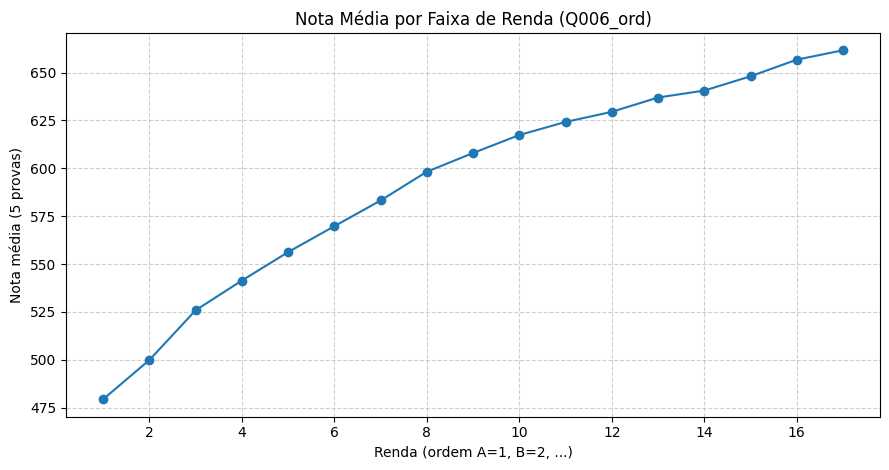

Correlação Q006_ord × NOTA_MEDIA_5: 0.46


In [5]:
g = df.groupby("Q006_ord", as_index=False)["NOTA_MEDIA_5"].mean().sort_values("Q006_ord")
plt.figure(figsize=(9,4.8))
plt.plot(g["Q006_ord"], g["NOTA_MEDIA_5"], marker="o")
plt.title("Nota Média por Faixa de Renda (Q006_ord)")
plt.xlabel("Renda (ordem A=1, B=2, ...)")
plt.ylabel("Nota média (5 provas)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

corr_renda_media = df["Q006_ord"].corr(df["NOTA_MEDIA_5"])
print("Correlação Q006_ord × NOTA_MEDIA_5:", round(corr_renda_media, 3))

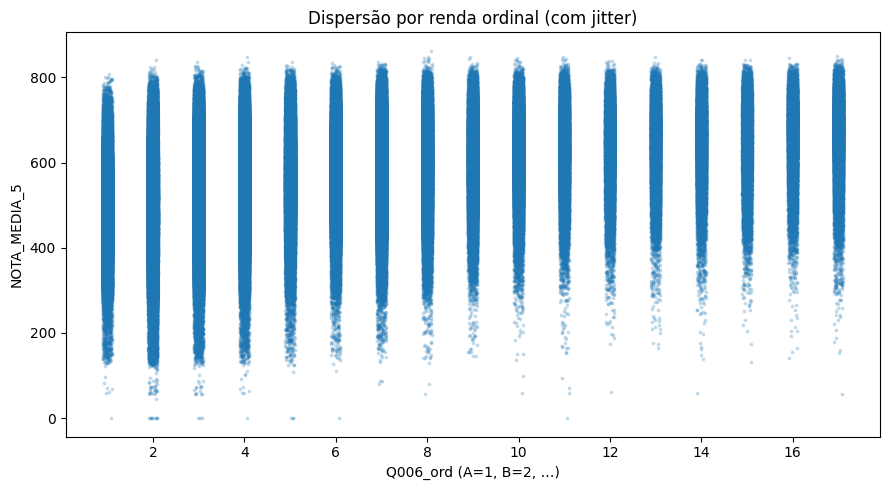

In [3]:
# scatter com jitter no x
x = df['Q006_ord']
y = df['NOTA_MEDIA_5']
jitter = (np.random.rand(len(x)) - 0.5) * 0.2
plt.figure(figsize=(9,5))
plt.scatter(x + jitter, y, s=3, alpha=0.2)
plt.xlabel('Q006_ord (A=1, B=2, …)')
plt.ylabel('NOTA_MEDIA_5')
plt.title('Dispersão por renda ordinal (com jitter)')
plt.tight_layout()
plt.show()

1	Nenhuma Renda
2	Até R$ 1.320,00
3	De R$ 1.320,01 até R$ 1.980,00.
4	De R$ 1.980,01 até R$ 2.640,00.
5	De R$ 2.640,01 até R$ 3.300,00.
6	De R$ 3.300,01 até R$ 3.960,00.
7	De R$ 3.960,01 até R$ 5.280,00.
8	De R$ 5.280,01 até R$ 6.600,00.
9	De R$ 6.600,01 até R$ 7.920,00.
10	De R$ 7.920,01 até R$ 9240,00.
11	De R$ 9.240,01 até R$ 10.560,00.
12	De R$ 10.560,01 até R$ 11.880,00.
13	De R$ 11.880,01 até R$ 13.200,00.
14	De R$ 13.200,01 até R$ 15.840,00.
15	De R$ 15.840,01 até R$19.800,00.
16	De R$ 19.800,01 até R$ 26.400,00.
17	Acima de R$ 26.400,00.

## 3) Escolaridade dos pais (Q001_ord, Q002_ord) × Nota

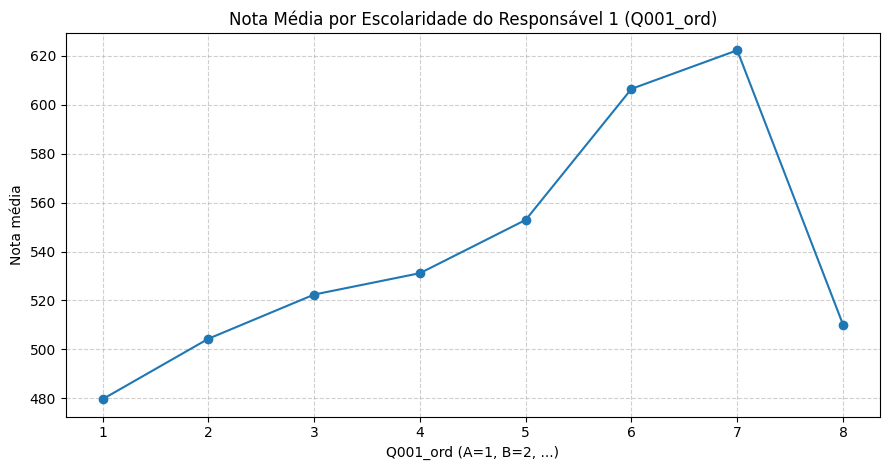

Correlação Q001_ord × NOTA_MEDIA_5: 0.221


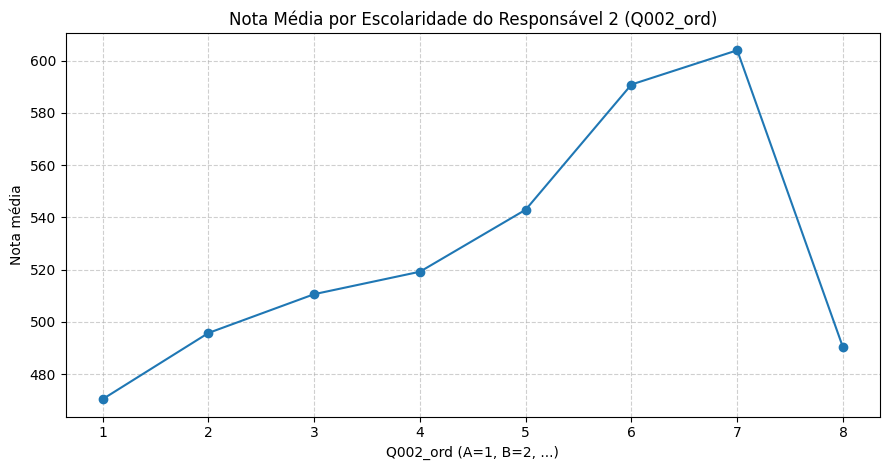

Correlação Q002_ord × NOTA_MEDIA_5: 0.299


In [6]:
g1 = df.groupby("Q001_ord", as_index=False)["NOTA_MEDIA_5"].mean().sort_values("Q001_ord")
plt.figure(figsize=(9,4.8))
plt.plot(g1["Q001_ord"], g1["NOTA_MEDIA_5"], marker="o")
plt.title("Nota Média por Escolaridade do Responsável 1 (Q001_ord)")
plt.xlabel("Q001_ord (A=1, B=2, ...)")
plt.ylabel("Nota média")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()
print("Correlação Q001_ord × NOTA_MEDIA_5:", round(df["Q001_ord"].corr(df["NOTA_MEDIA_5"]), 3))

g2 = df.groupby("Q002_ord", as_index=False)["NOTA_MEDIA_5"].mean().sort_values("Q002_ord")
plt.figure(figsize=(9,4.8))
plt.plot(g2["Q002_ord"], g2["NOTA_MEDIA_5"], marker="o")
plt.title("Nota Média por Escolaridade do Responsável 2 (Q002_ord)")
plt.xlabel("Q002_ord (A=1, B=2, ...)")
plt.ylabel("Nota média")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()
print("Correlação Q002_ord × NOTA_MEDIA_5:", round(df["Q002_ord"].corr(df["NOTA_MEDIA_5"]), 3))

## 4) Tipo de escola (TP_ESCOLA) × Nota

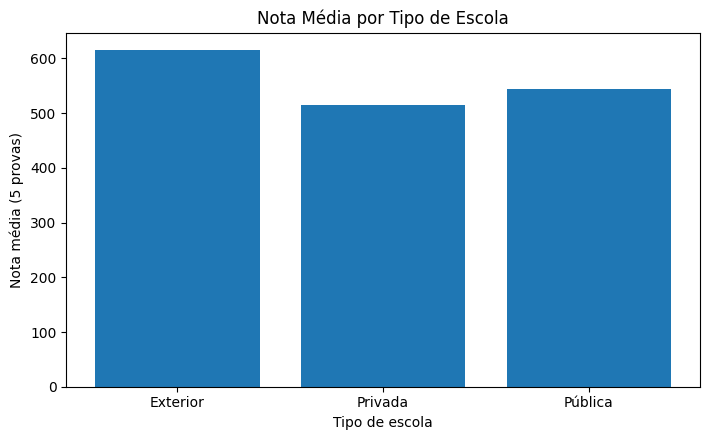

,TP_ESCOLA_lab,NOTA_MEDIA_5
0,Exterior,616.089247
2,Pública,543.891654
1,Privada,515.789085


In [7]:
map_escola = {1: "Pública", 2: "Privada", 3: "Exterior"}
lab = df["TP_ESCOLA"].map(map_escola).fillna(df["TP_ESCOLA"].astype(str))

grp = pd.DataFrame({"TP_ESCOLA_lab": lab, "NOTA_MEDIA_5": df["NOTA_MEDIA_5"]}).groupby("TP_ESCOLA_lab", as_index=False)["NOTA_MEDIA_5"].mean()

plt.figure(figsize=(7.2,4.5))
plt.bar(grp["TP_ESCOLA_lab"], grp["NOTA_MEDIA_5"])
plt.title("Nota Média por Tipo de Escola")
plt.xlabel("Tipo de escola")
plt.ylabel("Nota média (5 provas)")
plt.tight_layout()
plt.show()

grp.sort_values("NOTA_MEDIA_5", ascending=False)

## 5) Correlações cruzadas — renda, escolaridade e notas

In [8]:
cols_corr = ["Q006_ord","Q001_ord","Q002_ord","NOTA_MEDIA_5"] + NOTAS
sub = df[cols_corr].dropna()
corr = sub.corr(numeric_only=True).round(3)
print(corr)

                 Q006_ord  Q001_ord  Q002_ord  NOTA_MEDIA_5  NU_NOTA_MT  \
Q006_ord            1.000     0.316     0.400         0.460       0.462   
Q001_ord            0.316     1.000     0.490         0.221       0.220   
Q002_ord            0.400     0.490     1.000         0.299       0.293   
NOTA_MEDIA_5        0.460     0.221     0.299         1.000       0.843   
NU_NOTA_MT          0.462     0.220     0.293         0.843       1.000   
NU_NOTA_LC          0.382     0.193     0.244         0.793       0.629   
NU_NOTA_CH          0.380     0.173     0.224         0.802       0.638   
NU_NOTA_CN          0.396     0.175     0.231         0.781       0.721   
NU_NOTA_REDACAO     0.307     0.154     0.226         0.824       0.516   

                 NU_NOTA_LC  NU_NOTA_CH  NU_NOTA_CN  NU_NOTA_REDACAO  
Q006_ord              0.382       0.380       0.396            0.307  
Q001_ord              0.193       0.173       0.175            0.154  
Q002_ord              0.244       0.

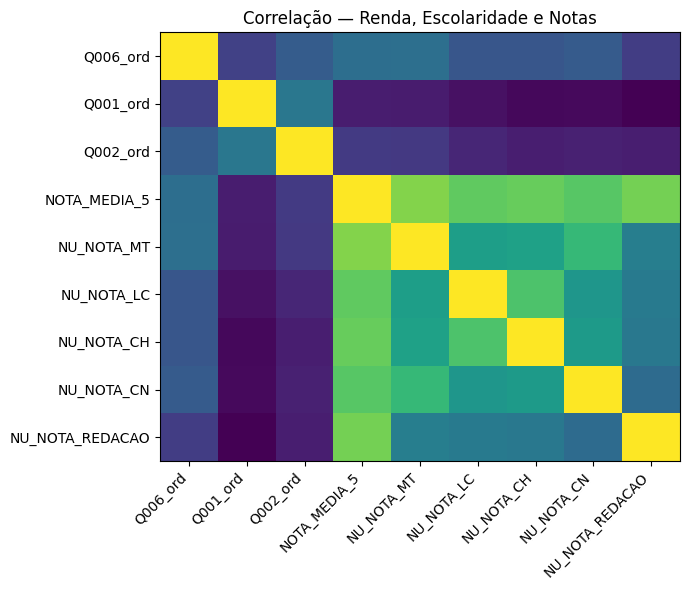

In [9]:
plt.figure(figsize=(7,6))
plt.imshow(corr, aspect='auto')
plt.title("Correlação — Renda, Escolaridade e Notas")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha='right')
plt.yticks(range(len(corr.index)), corr.index)
plt.tight_layout()
plt.show()

## 6) Interpretação e discussão (para apresentação)

- **Distribuições**: notas concentram-se em faixas médias; dispersão maior em Matemática e Redação.  
- **Renda × nota**: tendência monotônica crescente; correlação positiva entre `Q006_ord` e `NOTA_MEDIA_5`.  
- **Escolaridade × nota**: padrão semelhante para `Q001_ord` e `Q002_ord`.  
- **Tipo de escola**: médias maiores no privado, mas renda e escolaridade permanecem relevantes.  
- **Correlação cruzada**: renda e escolaridade correlacionam-se entre si e com notas, sobretudo *Matemática* e *Redação*.  

**Próximos passos**  
- Explorar análises por área com maior detalhe (com os notebooks 02 e 03).  
- Agrupar faixas de renda para simplificar comunicação (baixa/média/alta).  
- Testar ponderações de notas (contexto SISU/curso) ou modelos simples (regressão).